## EDA (Exploratory Data Analysis) and Feature Engineering


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('~/google-playstore-EDA/data/cleaned_data/google_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


## drop duplicate values

In [4]:
df[df.duplicated('App')].shape

(1181, 17)

In [5]:
df = df.drop_duplicates(subset=['App'], keep='first')

In [6]:
df.shape

(9659, 17)

In [7]:
def check_for_num_value(data):
    numerical_values = [i for i in data.columns if data[i].dtype != 'O']
    categorical_values = [i for i in data.columns if data[i].dtype == 'O']
    print(f"we have {len(numerical_values)} numerical values {numerical_values}")
    print(f"we have {len(categorical_values)} categorical values {categorical_values}")

In [8]:
check_for_num_value(df)

we have 9 numerical values ['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
we have 8 categorical values ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [9]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

## Feature Information 
1. describe every single columns
2. App
3. Category
4. Rating
5. Reviews
6. Size
7. Installs
8. Type
9. Price
10. Genres
11. Content Rating
11. Last Updated
12. Current Ver
13. Android Ver
14. Day
15. Month
16. Year

In [14]:
df['Size'].value_counts()

Size
11000.0    182
12000.0    181
14000.0    177
13000.0    177
15000.0    163
          ... 
552.0        1
885.0        1
1020.0       1
582.0        1
619.0        1
Name: count, Length: 459, dtype: int64

## what is the propotion of a data for evrey categorical Data 

In [33]:
def count_distinct_values(data):
    for i in data.columns:
        print(data[i].value_counts())
        print('-' * 100)

In [34]:
count_distinct_values(df)

Unnamed: 0
0        1
1        1
2        1
3        1
4        1
        ..
10836    1
10837    1
10838    1
10839    1
10840    1
Name: count, Length: 9659, dtype: int64
----------------------------------------------------------------------------------------------------
App
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
Pixel Draw - Number Art Coloring Book                 1
                                                     ..
Sya9a Maroc - FR                                      1
Fr. Mike Schmitz Audio Teachings                      1
Parkinson Exercices FR                                1
The SCP Foundation DB fr nn5n                         1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9659, dtype: int64
-------------------------------------------------------------------

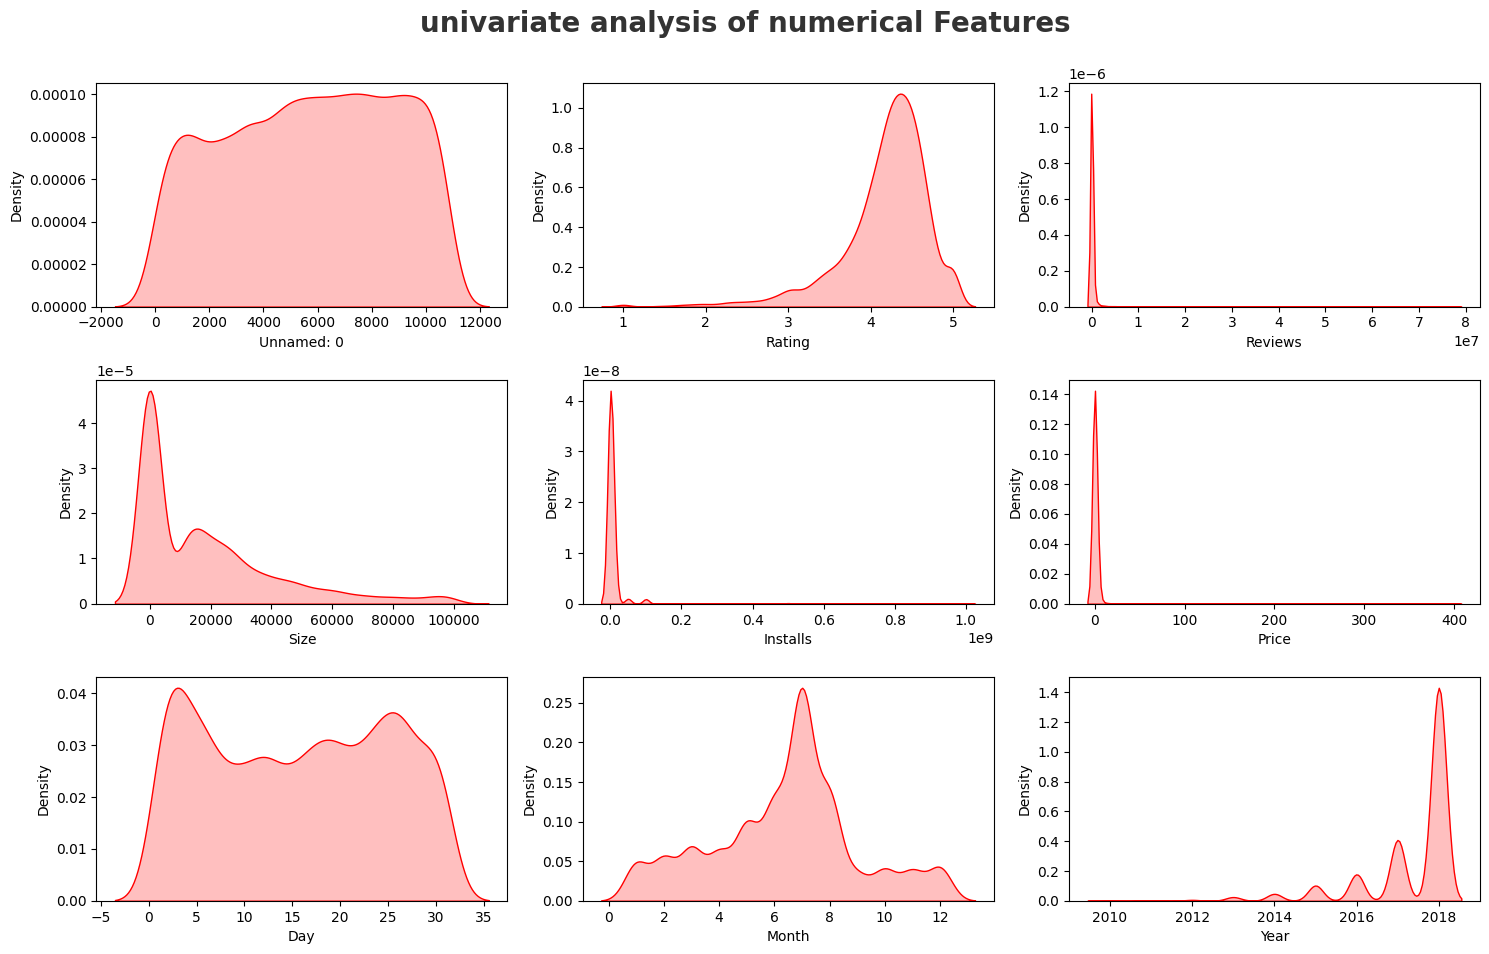

In [39]:
numerical_values = [i for i in df.columns if df[i].dtype != 'O']
plt.figure(figsize=(15, 15))
plt.suptitle("univariate analysis of numerical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numerical_values)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_values[i]], fill=True, color='r')
    plt.xlabel(numerical_values[i])
    plt.tight_layout()
    pass